In [1]:
'Saiful'

'Saiful'

In [2]:
import tensorflow as tf
import keras
import cv2
import glob
import numpy as np
import random
from keras.layers import Dense, Flatten,Conv2D, Softmax, BatchNormalization, ReLU, Dropout, ZeroPadding2D, MaxPool2D
from keras import Sequential
from keras.losses import sparse_categorical_crossentropy, categorical_crossentropy,binary_crossentropy
from keras.activations import sigmoid, softmax

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:

path = '/home/ashrafi/Documents/Shetu mam/final dataset/*/*.*'
classs = ['nv', 'akiec', 'bcc', 'vasc', 'df', 'mel', 'bkl']

td = []

for file in (glob.glob(path)):
    img = cv2.resize(cv2.imread(file), (32, 32))
    deg_name = file.split('/')[-2]
    label=classs.index(deg_name)
    td.append([img, label])
random.shuffle(td)

train_img = []
train_label = []

for img, la in td:
    train_img.append(img)
    train_label.append(la)

train_img = np.asarray(train_img).reshape(-1, 32, 32, 3)

In [4]:

model= Sequential()
model.add(Conv2D(32, (3,3),activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


model.fit(train_img,train_label,epochs=40, batch_size=32,
          validation_split=0.1)









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 64)        256       
___________________

Epoch 21/40
9012/9012 [==============================] - 12s 1ms/step - loss: 0.5948 - acc: 0.7735 - val_loss: 0.7845 - val_acc: 0.7046
Epoch 22/40
9012/9012 [==============================] - 12s 1ms/step - loss: 0.5873 - acc: 0.7732 - val_loss: 0.6468 - val_acc: 0.7705
Epoch 23/40
9012/9012 [==============================] - 12s 1ms/step - loss: 0.5845 - acc: 0.7747 - val_loss: 0.7140 - val_acc: 0.7595
Epoch 24/40
9012/9012 [==============================] - 12s 1ms/step - loss: 0.5661 - acc: 0.7847 - val_loss: 1.8119 - val_acc: 0.7076
Epoch 25/40
9012/9012 [==============================] - 12s 1ms/step - loss: 0.5684 - acc: 0.7854 - val_loss: 0.7922 - val_acc: 0.7625
Epoch 26/40
9012/9012 [==============================] - 12s 1ms/step - loss: 0.5595 - acc: 0.7905 - val_loss: 0.7688 - val_acc: 0.7555
Epoch 27/40
9012/9012 [==============================] - 12s 1ms/step - loss: 0.5520 - acc: 0.7906 - val_loss: 0.6684 - val_acc: 0.7515
Epoch 28/40
9012/9012 [=========================

In [5]:
model.save('/home/ashrafi/Documents/Shetu mam/secnd file.h5')

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import Model

In [7]:
img=cv2.resize(cv2.imread('/home/ashrafi/Documents/Shetu mam/final dataset/df/ISIC_0024386.jpg.jpg'),(32,32))

In [8]:
output_layers=[layer.output for layer in model.layers]
activation_model=Model(inputs=model.input, output=output_layers)
activations=activation_model.predict(img.reshape(1,32,32,3))

/home/ashrafi/anaconda3/envs/Ashrafi/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  


In [9]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1



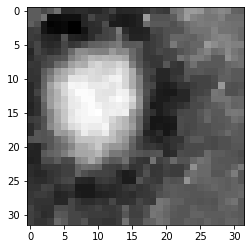

In [10]:
img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

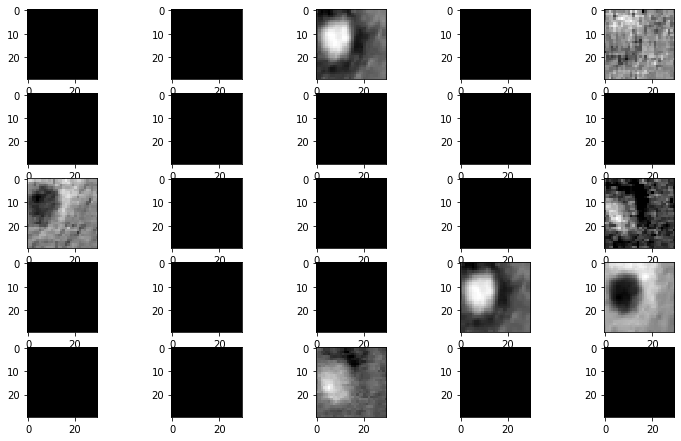

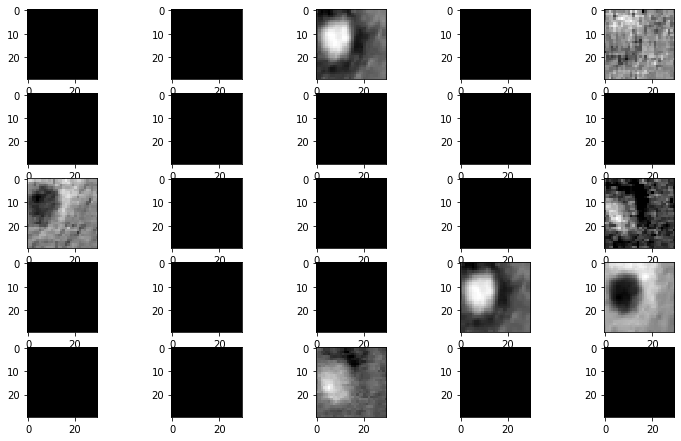

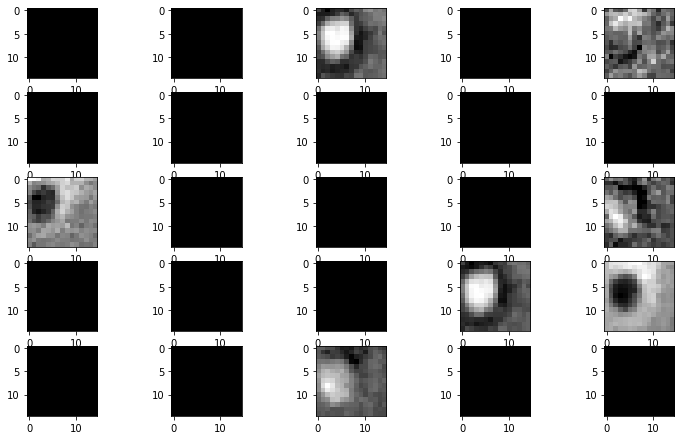

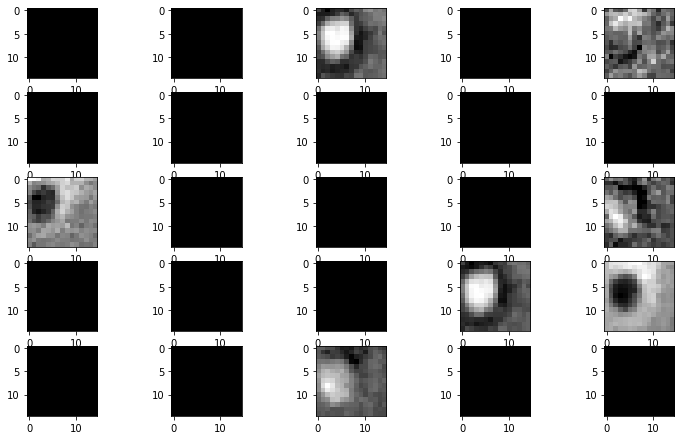

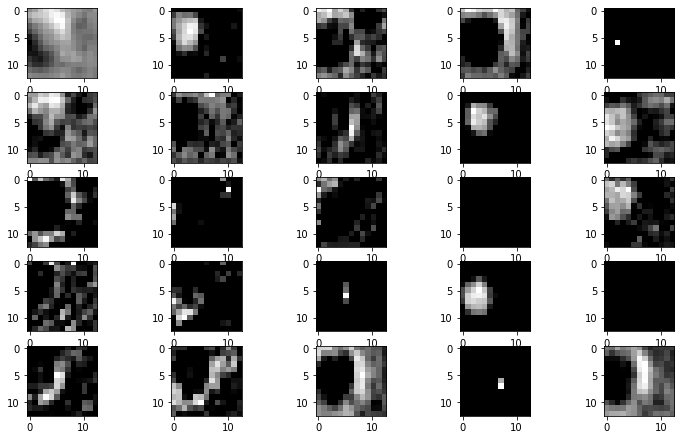

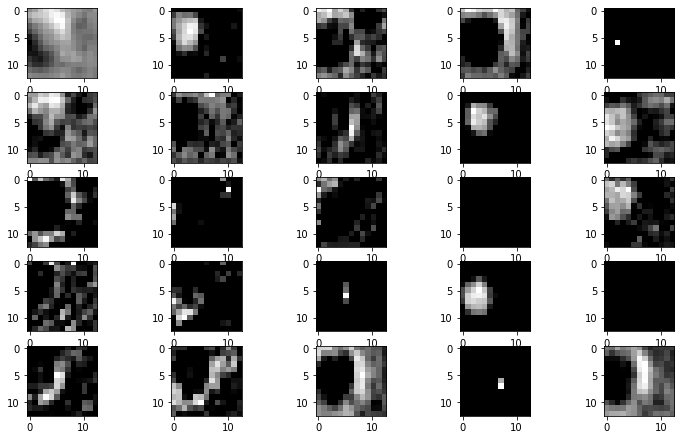

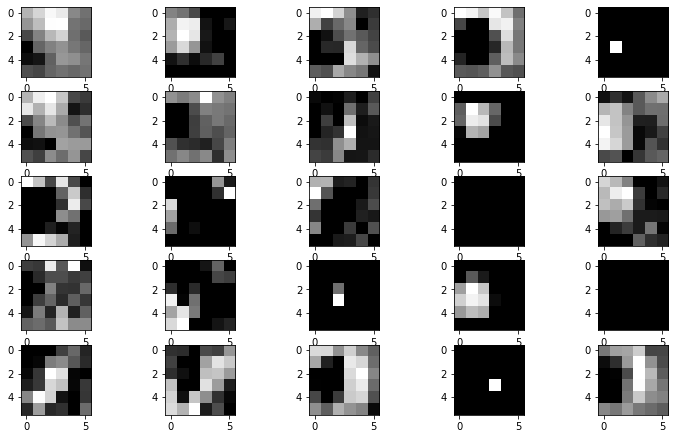

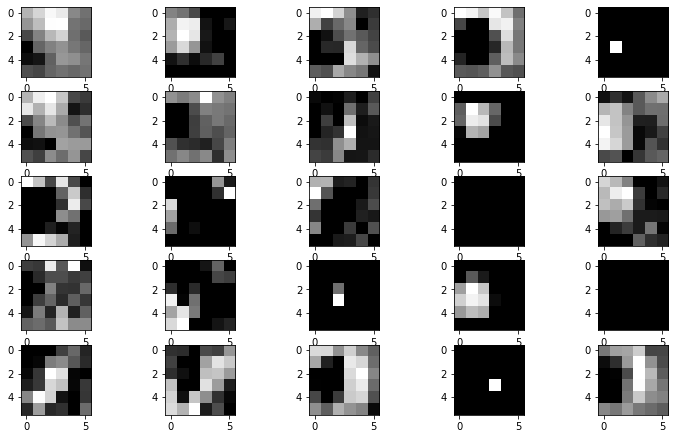

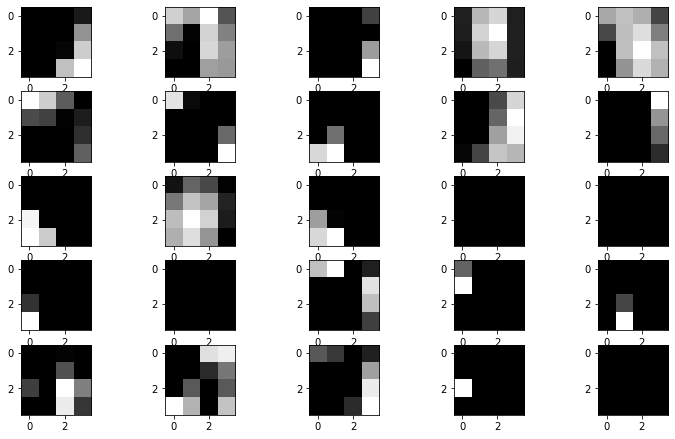

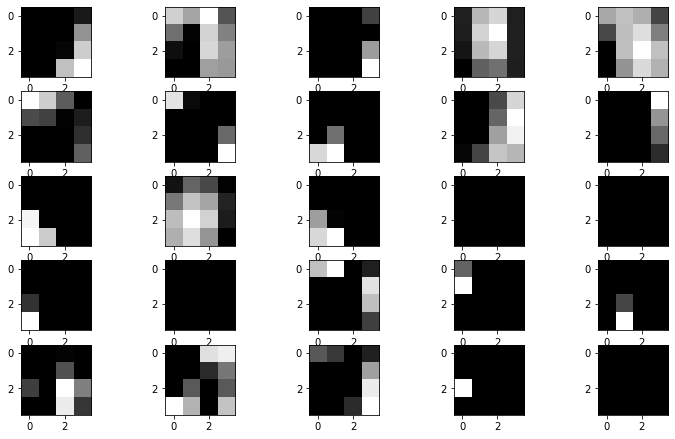

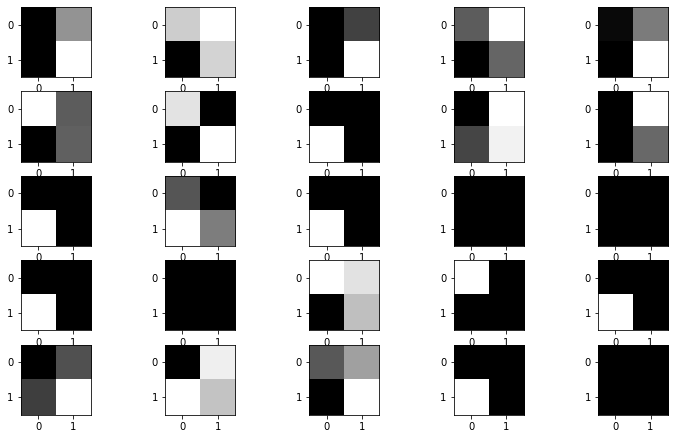

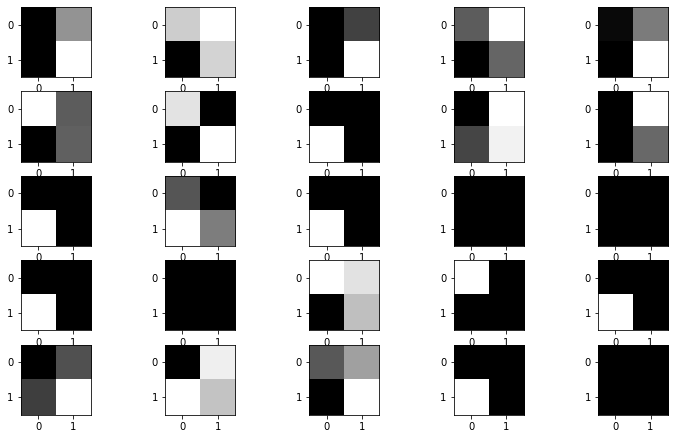

In [11]:
for i in range(12):
    display_activation(activations, 5, 5, i)

In [91]:
tredy=model.predict(train_img)

In [92]:
from keras.utils import np_utils
predY = np_utils.to_categorical(tredy)
trueY = np.argmax(predY, axis = 1) 

In [93]:
trueY=np.array(trueY).reshape(10014)

In [94]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

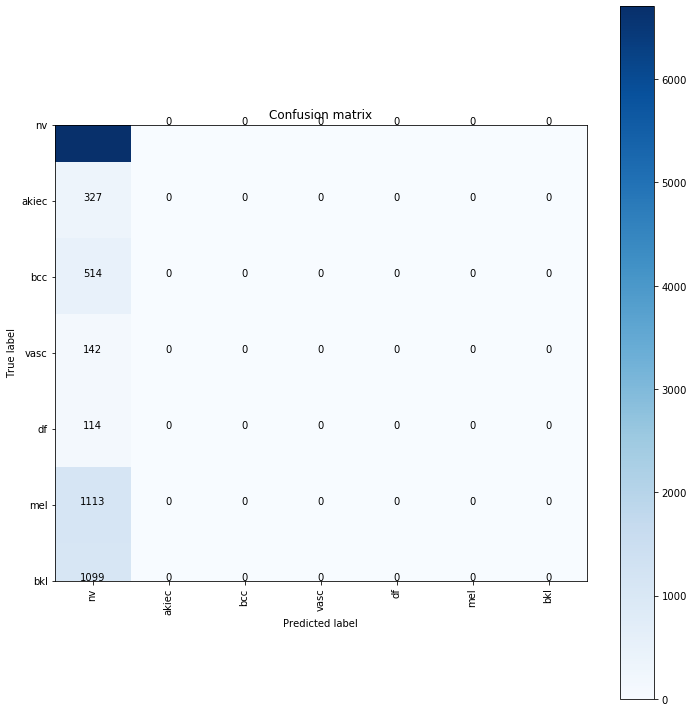

In [99]:
confusionMTX = confusion_matrix(train_label, trueY) 
plot_confusion_matrix(confusionMTX, classes = classs) 